SECTION A

1. What are the most popular websites at which, or through which, customers book their hotels at or through?

In [16]:
from scipy import stats
import pandas as pd
import numpy as np

print (hclick.columns.values)
print (hclick.shape)
print (hclick.info())
print (hclick.head())

['ID' 'DOMAIN_ID' 'MACHINE_ID' 'SITE_SESSION_ID' 'TRANS_FREQ'
 'DOMAIN_NAME' 'DIRECTP_D' 'PROD_NAME' 'PROD_QTY' 'PROD_TOTPRICE'
 'REF_DOMAIN_NAME' 'DURATION' 'PAGES_VIEWED' 'HOUSEHOLD_SIZE' 'CHILDREN_D'
 'CONNECTIONSPEED_D']
(3749, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3749 non-null   int64  
 1   DOMAIN_ID          3749 non-null   uint64 
 2   MACHINE_ID         3749 non-null   int64  
 3   SITE_SESSION_ID    3749 non-null   int64  
 4   TRANS_FREQ         3749 non-null   int64  
 5   DOMAIN_NAME        3749 non-null   object 
 6   DIRECTP_D          3749 non-null   int64  
 7   PROD_NAME          3749 non-null   object 
 8   PROD_QTY           3749 non-null   int64  
 9   PROD_TOTPRICE      3749 non-null   float64
 10  REF_DOMAIN_NAME    1687 non-null   object 
 11  DURATION           3749 non-

In [15]:
#Top 10 domain names
hclick['DOMAIN_NAME'].value_counts()[:10].sort_values(ascending=False)

marriott.com        524
hilton.com          438
hotels.com          400
expedia.com         380
priceline.com       309
choicehotels.com    297
jetblue.com         229
hotwire.com         217
bestwestern.com     120
orbitz.com          109
Name: DOMAIN_NAME, dtype: int64

In [9]:
#Top 10 reference domain names
hclick['REF_DOMAIN_NAME'].value_counts()[:10].sort_values(ascending=False)

google.com           620
yahoo.com            222
bing.com             129
aol.com               53
comfortinn.com        48
jetblue.com           43
qualityinn.com        29
comfortsuites.com     22
kayak.com             20
mywebsearch.com       17
Name: REF_DOMAIN_NAME, dtype: int64

2. Create new variables to examine its distribution and possibly its role in answering our questions.

In [63]:
hclick.loc[hclick.REF_DOMAIN_NAME == 'NaN', 'REF_D']=0
hclick.loc[hclick.REF_DOMAIN_NAME != 'NaN', 'REF_D']=1

hclick.loc[hclick.PROD_TOTPRICE>500,'LOG_PRICE']=0
hclick.loc[hclick.PROD_TOTPRICE<499,'LOG_PRICE']=1
hclick.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'LOG_PRICE', 'REF_D'],
      dtype='object')

3. Look into descriptive statistics of key variables of your interest

In [64]:
hclick[['DIRECTP_D', 'REF_D', 'DURATION', 'LOG_PRICE', 'PAGES_VIEWED', 'TRANS_FREQ']].describe()

,DIRECTP_D,REF_D,DURATION,LOG_PRICE,PAGES_VIEWED,TRANS_FREQ
count,3749.000000,3749.0,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.481462,1.0,25.317508,0.959989,18.331288,2.981328
std,0.499723,0.0,22.806497,0.196010,16.636523,4.120927
min,0.000000,1.0,0.029999,0.000000,1.000000,1.000000
25%,0.000000,1.0,9.449219,1.000000,8.000000,1.000000
50%,0.000000,1.0,17.777344,1.000000,13.000000,2.000000
75%,1.000000,1.0,33.656250,1.000000,23.000000,3.000000
max,1.000000,1.0,227.343750,1.000000,141.000000,30.000000


Scatterplot

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\cynth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PAGES_VIEWED', ylabel='DURATION'>

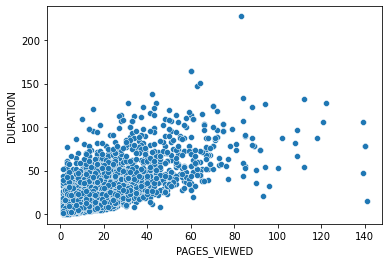

In [45]:
x = "PAGES_VIEWED"
y = "DURATION"
sns.scatterplot(x, y, data=hclick)

Histogram

array([[<AxesSubplot:title={'center':'DIRECTP_D'}>]], dtype=object)

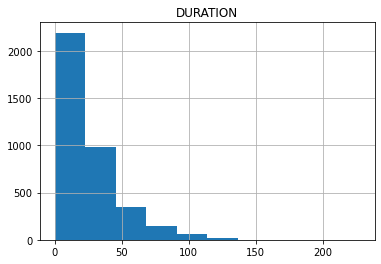

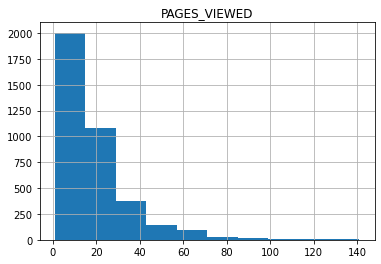

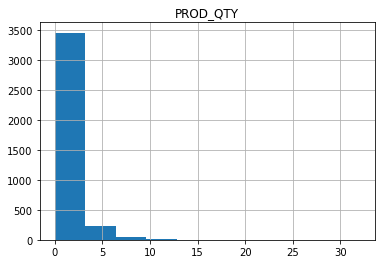

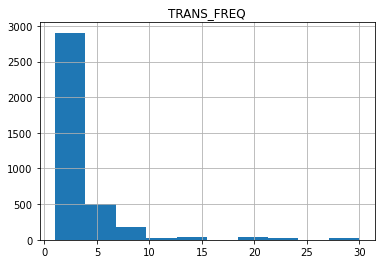

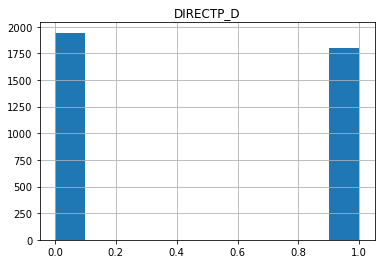

In [59]:
hclick.hist('DURATION')
hclick.hist('PAGES_VIEWED')
hclick.hist('PROD_QTY')
hclick.hist('TRANS_FREQ')
hclick.hist('DIRECTP_D')

Part 2

1. why do some people spend more time when booking hotels

In [3]:
import pandas as pd
import statsmodels.api as sm
hclick=pd.read_excel('hclick.xls')
hclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3749 non-null   int64  
 1   DOMAIN_ID          3749 non-null   uint64 
 2   MACHINE_ID         3749 non-null   int64  
 3   SITE_SESSION_ID    3749 non-null   int64  
 4   TRANS_FREQ         3749 non-null   int64  
 5   DOMAIN_NAME        3749 non-null   object 
 6   DIRECTP_D          3749 non-null   int64  
 7   PROD_NAME          3749 non-null   object 
 8   PROD_QTY           3749 non-null   int64  
 9   PROD_TOTPRICE      3749 non-null   float64
 10  REF_DOMAIN_NAME    1687 non-null   object 
 11  DURATION           3749 non-null   float64
 12  PAGES_VIEWED       3749 non-null   int64  
 13  HOUSEHOLD_SIZE     3749 non-null   int64  
 14  CHILDREN_D         3749 non-null   int64  
 15  CONNECTIONSPEED_D  3749 non-null   int64  
dtypes: float64(2), int64(10)

In [4]:
#Step 2:specify model
mod=sm.OLS(hclick.DURATION,hclick[['PROD_QTY', 'DIRECTP_D']])

In [5]:
#fit data into model
res=mod.fit()

#Step 3: print out result summary
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               DURATION   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              1347.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:17:10   Log-Likelihood:                         -17533.
No. Observations:                3749   AIC:                                  3.507e+04
Df Residuals:                    3747   BIC:                                  3.508e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
indepvar=sm.add_constant(hclick[['PROD_QTY','DIRECTP_D']])
mod=sm.OLS(hclick.DURATION,indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     86.77
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.45e-37
Time:                        20:17:59   Log-Likelihood:                -16958.
No. Observations:                3749   AIC:                         3.392e+04
Df Residuals:                    3746   BIC:                         3.394e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.0263      0.710     36.677      0.0

2.  why do some people visit more pages when booking hotels

In [7]:
mod=sm.OLS(hclick.PAGES_VIEWED,hclick[['PROD_QTY', 'TRANS_FREQ']])
#fit data into model
res=mod.fit()

#Step 3: print out result summary
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           PAGES_VIEWED   R-squared (uncentered):                   0.436
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                              1451.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:18:09   Log-Likelihood:                         -16275.
No. Observations:                3749   AIC:                                  3.255e+04
Df Residuals:                    3747   BIC:                                  3.257e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
indepvar=sm.add_constant(hclick[['PROD_QTY','TRANS_FREQ']])
mod=sm.OLS(hclick.PAGES_VIEWED,indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     32.51
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.00e-14
Time:                        20:18:19   Log-Likelihood:                -15828.
No. Observations:                3749   AIC:                         3.166e+04
Df Residuals:                    3746   BIC:                         3.168e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2828      0.481     31.790      0.0